<a href="https://colab.research.google.com/github/EricCallaway/COSC_5313_homework_6/blob/main/AI_homework_6_GAN_blog_4_firstGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [3]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

Random Seed generator to replicate results

In [5]:
torch.manual_seed(1337)

Preparing Data

In [6]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

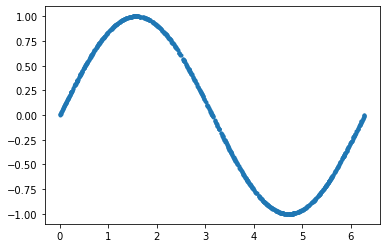

In [7]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

Creating a data loader

In [8]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

Implementing the Discriminator

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [10]:
discriminator = Discriminator()

Implementing Generator

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

Train the Models

In [12]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [15]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss Discriminator.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss Generator.: {loss_generator}")
            print('-'*100)

Epoch: 0 Loss Discriminator.: 0.746151864528656
Epoch: 0 Loss Generator.: 0.7215326428413391
----------------------------------------------------------------------------------------------------
Epoch: 10 Loss Discriminator.: 0.5797874927520752
Epoch: 10 Loss Generator.: 1.0234901905059814
----------------------------------------------------------------------------------------------------
Epoch: 20 Loss Discriminator.: 0.680560290813446
Epoch: 20 Loss Generator.: 0.8134245872497559
----------------------------------------------------------------------------------------------------
Epoch: 30 Loss Discriminator.: 0.7200827598571777
Epoch: 30 Loss Generator.: 0.7732768058776855
----------------------------------------------------------------------------------------------------
Epoch: 40 Loss Discriminator.: 0.6218294501304626
Epoch: 40 Loss Generator.: 0.7611435651779175
----------------------------------------------------------------------------------------------------
Epoch: 50 Loss Disc

In [16]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

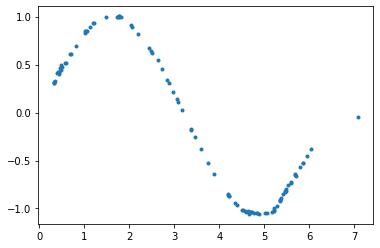

In [17]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")